## Описание данных

***Таблица products:***

*product_id* - id товара  
*level1* - категория  
*level2* - подкатегория  
*name* - наименование товара  

***Таблица orders:***  

*order_id* - номер чека  
*accepted_at* - дата и время чека  
*product_id* - id товара  
*quantity* - кол-во товара в чеке  
*regular_price* - регулярная цена  
*price* - текущая цена  
*cost_price* - закупочная цена  

Исходные данные: https://disk.yandex.ru/d/EkSfw6q9qLKmNA

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (9, 7)
pd.set_option('display.max_rows', 100)

In [3]:
df_orders = pd.read_excel('orders.xlsx')
df_products = pd.read_excel('products.xlsx')

In [4]:
df_orders.head(3)

,order_id,accepted_at,product_id,quantity,regular_price,price,cost_price
0,1517514900,2022-01-13 16:48:19,17122,1,169,169,74
1,1517430051,2022-01-13 16:46:53,17122,1,169,169,74
2,1517578174,2022-01-13 18:12:30,17122,1,169,169,74


In [5]:
df_products.head(3)

,product_id,level1,level2,name
0,1,Гигиена,Бритье,Кассеты для бритья Gillette Fusion ProGlide Po...
1,2,Мучные кондитерские изделия,Мучные кондитерские изделия,Печенье Бодрость
2,3,Мясная гастрономия,"Сосиски, сардельки",Сосиски Стародворье


In [6]:
merged = df_products.merge(df_orders, on='product_id')
merged.shape

(3018, 10)

In [7]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3018 entries, 0 to 3017
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   product_id     3018 non-null   int64         
 1   level1         3018 non-null   object        
 2   level2         3018 non-null   object        
 3   name           3010 non-null   object        
 4   order_id       3018 non-null   int64         
 5   accepted_at    3018 non-null   datetime64[ns]
 6   quantity       3018 non-null   int64         
 7   regular_price  3018 non-null   int64         
 8   price          3018 non-null   int64         
 9   cost_price     3018 non-null   int64         
dtypes: datetime64[ns](1), int64(6), object(3)
memory usage: 259.4+ KB


# Задания

## 1. Самая ходовая товарная группа

По какой категории товаров продано больше всего позиций?  

In [8]:
merged.groupby('level1')['quantity'].sum().sort_values(ascending = False).idxmax()

'Безалкогольные напитки'

Подкрепите свой ответ таблицей, в которой рассчитано количество проданных штук товара в каждой товарной категории.

In [9]:
best_category = merged.groupby('level1')['quantity'].sum().sort_values(ascending = False).reset_index()
best_category

,level1,quantity
0,Безалкогольные напитки,534
1,Молочная продукция,483
2,Свежие овощи,262
3,Кулинария,250
4,Бакалея,239
5,Хлеб и хлебобулочные изделия,218
6,Снэки,212
7,Свежие фрукты,184
8,Замороженная продукция,175
9,Кондитерские изделия,138


Дополнительно постройте на основании этой таблицы barchart.

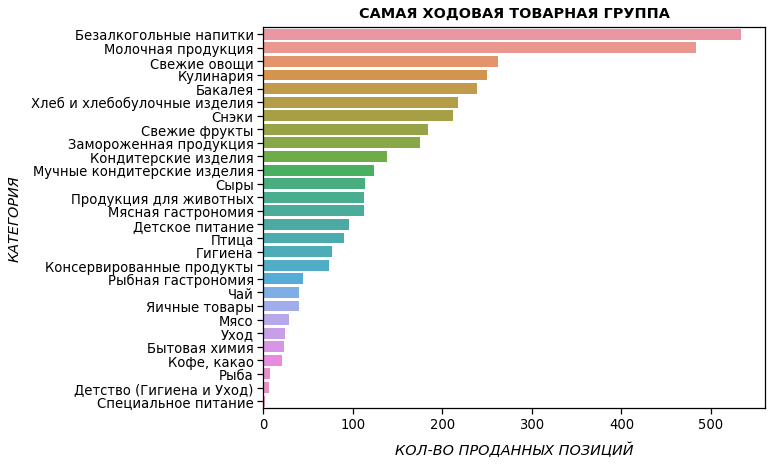

In [10]:
sns.set_context("notebook", font_scale=1.2) 
sns.barplot(y='level1', x='quantity', data=best_category);
plt.title('САМАЯ ХОДОВАЯ ТОВАРНАЯ ГРУППА', fontweight='bold', pad=10);
plt.xlabel('КОЛ-ВО ПРОДАННЫХ ПОЗИЦИЙ', fontstyle='italic', labelpad=10);
plt.ylabel('КАТЕГОРИЯ', fontstyle='italic', labelpad=10);

## 2. Распределение продаж по подкатегориям

Оцените распределение количества проданных позиций в каждой товарной категории (level1) по подкатегориям (level2). 

Проиллюстрируйте свой результат расчетной таблицей.

In [11]:
sales_by_category = merged.groupby(['level1','level2'])['quantity'].sum().reset_index().sort_values(by=['level1', 'quantity'], ascending=[True, False])
sales_by_category.head(50)

,level1,level2,quantity
10,Бакалея,Сухие блюда быстрого приготовления,38
3,Бакалея,"Крупы, бобовые",30
1,Бакалея,Зерновые для завтраков,24
4,Бакалея,Макаронные изделия,24
9,Бакалея,Соусы,24
2,Бакалея,Ингредиенты для готовки,21
6,Бакалея,Пряности,21
5,Бакалея,Мука и мучные смеси,19
7,Бакалея,Растительные масла,18
8,Бакалея,Сахар,11


## 3. Найти средний чек в заданную дату

Какой средний чек был 13.01.2022?

In [12]:
df_orders['date'] = df_orders['accepted_at'].dt.strftime('%d.%m.%Y')
df_orders['total_cost'] = df_orders['quantity'] * df_orders['price'] 

In [13]:
dt_filtered = df_orders[df_orders['date'] == '13.01.2022']

In [14]:
dt_avg = dt_filtered.groupby('order_id')['total_cost'].sum().reset_index()
cheque_avg = round(dt_avg['total_cost'].mean(),2)
cheque_avg

915.64

## 4. Доля промо в заданной категории

- Посчитать, какую долю от общих продаж категории Сыры занимают промо (в штуках)  

In [15]:
df_filtered = merged[merged['level1'] == 'Сыры'].copy()
df_filtered.loc[:, 'is_promo'] = np.where(df_filtered['regular_price'] > df_filtered['price'], 'Promo', "Without")

cheese_promo = df_filtered[df_filtered['is_promo'] == 'Promo']['quantity'].sum()
cheese_total = merged[(merged['level1'] == 'Сыры')]['quantity'].sum()

res = round((cheese_promo / cheese_total), 5)
res

0.30702

- Построить пайчарт, который это проиллюстрирует. На графике должны быть видны группы, соответствующие доли и понятные подписи к ним.  

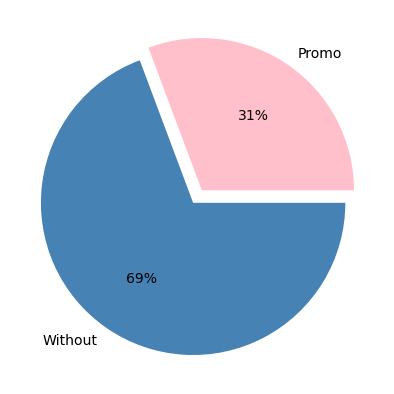

In [16]:
df_pie = df_filtered.groupby('is_promo')['quantity'].sum().reset_index()

color = ['pink', 'steelblue']
b = (0.05, 0.05)
textprops = {'fontsize': 14}

plt.pie(df_pie['quantity'], labels=df_pie['is_promo'], autopct='%1.0f%%', colors=color, explode=b, textprops=textprops);

## 5. Посчитать маржу по категориям

- В рублях

In [17]:
margin_rub = merged.groupby('level1').apply(lambda x: sum((x['price'] - x['cost_price'])*x['quantity'])).\
                            reset_index(name='margin_rub').rename(columns={'level1': 'сategory'})\
                            .sort_values(by='margin_rub', ascending = False)
margin_rub

,сategory,margin_rub
1,Безалкогольные напитки,20373
10,Кулинария,18452
6,Замороженная продукция,13099
11,Молочная продукция,12493
13,Мясная гастрономия,10230
21,Снэки,9582
19,Свежие овощи,9006
0,Бакалея,8177
20,Свежие фрукты,7879
23,Сыры,7474


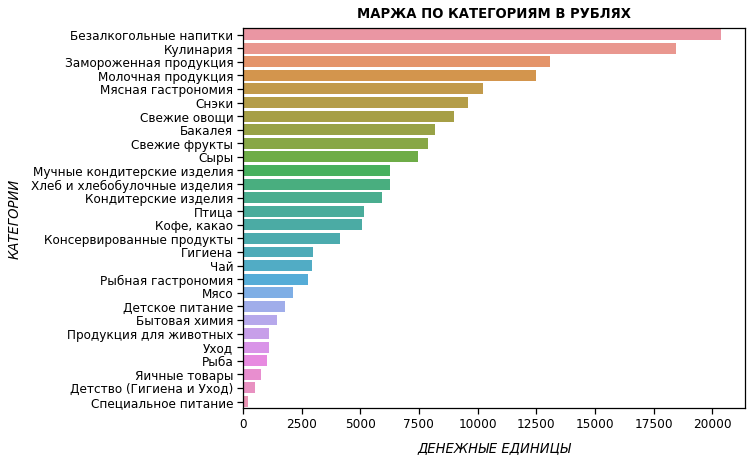

In [18]:
sns.set_context("notebook", font_scale=1.1) 
sns.barplot(y='сategory', x='margin_rub', data=margin_rub);
plt.title('МАРЖА ПО КАТЕГОРИЯМ В РУБЛЯХ', fontweight='bold', pad=10);
plt.xlabel('ДЕНЕЖНЫЕ ЕДИНИЦЫ', fontstyle='italic', labelpad=10);
plt.ylabel('КАТЕГОРИИ', fontstyle = 'italic', labelpad=10);

- В процентах

In [19]:
margin_percent = merged.groupby('level1').apply(lambda x: sum((x['price'] - x['cost_price'])*x['quantity']/\
            sum(x['price']*x['quantity']) * 100)).reset_index(name='margin_percent').rename(columns={'level1': 'сategory'})\
            .sort_values(by='margin_percent', ascending = False)

margin_percent

,сategory,margin_percent
9,"Кофе, какао",51.828706
22,Специальное питание,50.731707
6,Замороженная продукция,47.264920
26,Чай,45.672852
12,Мучные кондитерские изделия,45.188435
10,Кулинария,45.181195
1,Безалкогольные напитки,44.186349
21,Снэки,42.630244
25,Хлеб и хлебобулочные изделия,42.454496
7,Кондитерские изделия,42.447282


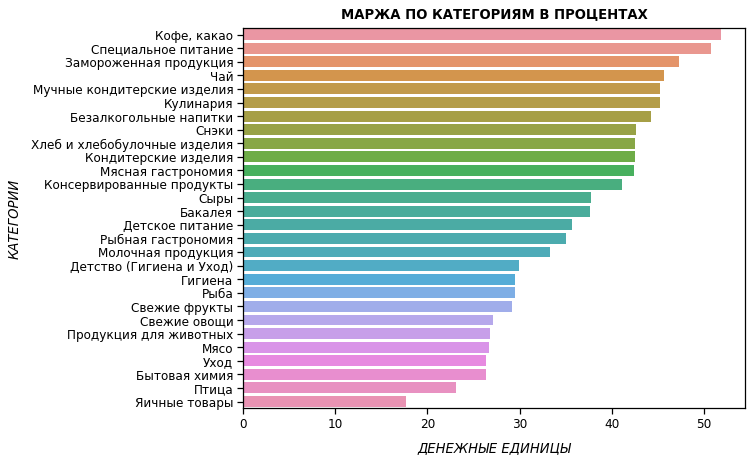

In [20]:
sns.set_context("notebook", font_scale=1.1) 
sns.barplot(y='сategory', x='margin_percent', data=margin_percent);
plt.title('МАРЖА ПО КАТЕГОРИЯМ В ПРОЦЕНТАХ', fontweight='bold', pad=10)
plt.xlabel('ДЕНЕЖНЫЕ ЕДИНИЦЫ', fontstyle='italic', labelpad=10);
plt.ylabel('КАТЕГОРИИ', fontstyle = 'italic', labelpad=10);

## 6. ABC анализ

***Важно:*** ABC-анализ провести по подкатегориям, а не по отдельным товарам. Имеющихся данных за небольшой период недостаточно для качественного анализа на уровне товаров. Количество товаров слишком велико, что может также исказить результаты. ABC-анализ по подкатегориям даст более адекватную и интерпретируемую картину.

- Сделайте ABC-анализ продаж по количеству и сумме продаж

In [21]:
merged = merged.rename(columns={'level2':'Name', 'quantity':'Quantity'})

In [22]:
merged['Price'] = merged['price'] * merged['Quantity']

In [23]:
df = merged[['Name', 'Price', 'Quantity']]

In [24]:
df.head(10)

,Name,Price,Quantity
0,Сухие блюда быстрого приготовления,108,6
1,Сухие блюда быстрого приготовления,36,2
2,Сухие блюда быстрого приготовления,18,1
3,Сухие блюда быстрого приготовления,36,2
4,Сухие блюда быстрого приготовления,72,4
5,Сухие блюда быстрого приготовления,90,5
6,Женская гигиена,113,1
7,Женская гигиена,113,1
8,Женская гигиена,113,1
9,Женская гигиена,113,1


In [25]:
def perform_abc(df, index):
    cols = list(df.columns)
    cols.remove(index)
    groupped_df = df.groupby(index).agg({'Quantity': 'sum', 'Price':'sum'})
    for col in cols:
        groupped_df = groupped_df.sort_values(col, ascending=False)
        for i in range(len(groupped_df)):
            groupped_df[f'rel_{col}'] = groupped_df[col] / sum(groupped_df[col])
            groupped_df[f'cumsum_{col}'] = groupped_df[f'rel_{col}'].cumsum()
            groupped_df[f'ABC_{col}'] = np.where(groupped_df[f'cumsum_{col}'] < 0.8, 'A', np.where(groupped_df[f'cumsum_{col}'] < 0.95, 'B', 'C'))
    res = groupped_df[cols + [f'ABC_{col}' for col in cols]].reset_index()
    res['ABC_join'] = res[['ABC_Price', 'ABC_Quantity']].agg(' '.join, axis=1)
    return res

In [26]:
abc_df = perform_abc(df, index='Name') 

In [27]:
abc_df

,Name,Price,Quantity,ABC_Price,ABC_Quantity,ABC_join
0,Напитки,24123,252,A,A,A A
1,Готовые блюда,40356,248,A,A,A A
2,Хлеб и хлебобулочные изделия,14724,218,A,A,A A
3,Снэки соленые,17293,180,A,A,A A
4,Воды питьевые,9141,162,A,A,A A
5,"Корнеплоды, зелень и прочие овощи",14893,157,A,A,A A
6,Молоко и сливки,14902,147,A,A,A A
7,Молочно-десертные продукты,5999,116,A,A,A A
8,"Цитрусовые, семечковые и прочие плоды",16818,108,A,A,A A
9,Кисломолочные традиционные продукты,8760,106,A,A,A A
